In [2]:
%matplotlib inline 

from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import gridspec
import requests
from pattern import web
import math as m

In [3]:
url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
website_html = requests.get(url).text
#print website_html

In [4]:
def get_population_html_tables(html):
    """Parse html and return html tables of wikipedia population data."""
    dom = web.Element(html)
#    tbls = dom('table') #all the tables
    tbls=dom.by_class('sortable wikitable')  #the tables we want
    return tbls

tables = get_population_html_tables(website_html)
print "table length: %d" %len(tables)
for t in tables:
    print t.attributes

table length: 3
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}


In [5]:
def table_type1(tbl): # extract the table type
    return tbl('th')[1].content

def table_type2(tbl): # extract the table type a different way
    headers = [th.content for th in tbl.by_tag('th')]
#    type(headers)
    return headers[1]

print table_type1(tables[0])
print table_type1(tables[1])
print table_type1(tables[2])

Country (or dependent territory)
Country (or dependent territory)
Country (or dependent territory)


In [6]:
tables_by_type1 = defaultdict(list)
for t in tables:
    tables_by_type1[table_type1(t)].append(t)
"""now I have a dictionary with one key and an array of values associated with it"""
    
print tables_by_type1

defaultdict(<type 'list'>, {u'Country (or dependent territory)': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')]})


In [7]:
"""alternate way of doing this"""
table_by_type2 = defaultdict(list)
for t in tables:
    typ = table_type2(t)
    if typ not in table_by_type2:
        table_by_type2[typ] = list()
    table_by_type2[typ].append(t)
    
print table_by_type2

defaultdict(<type 'list'>, {u'Country (or dependent territory)': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')]})


In [8]:
def get_countries_population(tables):
    """extract population data from each table and store it in dictionary."""
    
    result = defaultdict(dict)

    for tbl in tables:
        headers = tbl('tr')
        first_header = headers[0]
        th_s = first_header('th')
    
        years = [int(val.content) for val in th_s if val.content.isnumeric()]
        year_indices = [idx for idx, val in enumerate(th_s) if val.content.isnumeric()]
        # 2. step: iterate over all tables, extract headings and actual data and combine data into single dict
        rows = tbl('tr')[1:]
        for row in rows:
            tds = row('td')
            country_name = tds[1]('a')[0].content
            population_by_year=[]
            for colidx in year_indices:
                popu=tds[colidx].content.replace(',', '')
                if popu[0] == '<': #check if the item is bold
                    popu = popu[3:-4] #remove the bold tags
                population_by_year.append(int(popu)/1000.0) #convert to units of millions
            subdict = dict(zip(years, population_by_year))
            #print zip(years,population_by_year)
            result[country_name].update(subdict)
    
    return result


result = get_countries_population(tables_by_type1['Country (or dependent territory)'])
#print result


In [9]:
"""convert dictionary to dataframe"""
dataframe=pd.DataFrame.from_dict(result,orient='index')
dataframe.sort_index(axis=1,inplace=True)
dataframe = dataframe.rename(index={"Democratic Republic of the Congo": "DR Congo"})
dataframe

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
Afghanistan,8.151,8.892,9.830,10.998,12.431,14.133,15.045,13.120,13.569,19.446,...,26.335,29.121,32.565,36.644,41.118,45.665,50.195,54.717,59.256,63.796
Albania,1.228,1.393,1.624,1.884,2.157,2.402,2.672,2.957,3.245,3.159,...,3.025,2.987,3.030,3.075,3.105,3.103,3.063,2.994,2.913,2.825
Algeria,8.893,9.842,10.910,11.964,13.932,16.141,18.807,22.009,25.191,28.322,...,32.918,35.950,39.543,42.973,45.842,48.149,50.118,52.030,53.894,55.445
American Samoa,0.020,0.020,0.021,0.025,0.028,0.030,0.033,0.039,0.048,0.054,...,0.057,0.056,0.055,0.054,0.054,0.053,0.052,0.051,0.050,0.050
Andorra,0.007,0.007,0.009,0.014,0.020,0.027,0.034,0.045,0.053,0.064,...,0.077,0.085,0.086,0.086,0.086,0.085,0.083,0.082,0.079,0.075
Angola,4.118,4.424,4.798,5.135,5.606,6.051,7.206,8.390,9.486,11.000,...,14.770,17.043,19.626,22.485,25.674,29.155,32.910,36.948,41.280,45.889
Anguilla,0.006,0.006,0.006,0.006,0.007,0.007,0.007,0.007,0.009,0.010,...,0.014,0.015,0.017,0.019,0.020,0.022,0.023,0.025,0.026,0.027
Antigua and Barbuda,0.046,0.052,0.055,0.060,0.066,0.069,0.069,0.065,0.065,0.069,...,0.082,0.087,0.093,0.099,0.104,0.110,0.114,0.118,0.121,0.123
Argentina,17.151,18.928,20.617,22.284,23.963,26.082,28.370,30.672,33.036,35.274,...,39.182,41.344,43.432,45.379,47.165,48.796,50.273,51.574,52.663,53.512
Armenia,1.356,1.566,1.869,2.206,2.520,2.835,3.134,3.465,3.530,3.131,...,3.085,3.072,3.057,3.022,2.962,2.884,2.796,2.699,2.590,2.469


In [10]:
years = [1950, 2000, 2015, 2050]
pops = [dataframe.loc["World",i]/1000 for i in years]
print pops

[2.5576289999999999, 6.0885720000000001, 7.2564909999999996, 9.4081419999999998]


In [11]:
print "length"
print len(dataframe.index)

subtable = dataframe.iloc[30:35,0:3]
print "subtable"
print subtable
print ""

column = dataframe[2020]
print column
print ""

row = dataframe.ix[30]
print "row"
print row
print ""

rows = dataframe.ix[30:35]
print "rows"
print rows
print ""

element = dataframe.ix[0,1955]
print "element"
print element
print ""

print "max"
print dataframe[2050].argmax()
print dataframe[2050].max()
print ""

print "axes"
print dataframe.axes
print ""

row = dataframe.ix[0]
print "row info"
print row.name
print row.index
print ""

countries = dataframe.index
print "countries"
print countries
print ""

print "Yemen"
print dataframe.ix['Yemen']

length
228
subtable
               1950   1955   1960
Bulgaria      7.251  7.500  7.868
Burkina Faso  4.377  4.615  4.866
Burundi       2.363  2.577  2.816
Cambodia      4.472  5.049  5.762
Cameroon      4.888  5.211  5.609

Afghanistan                       36.644
Albania                            3.075
Algeria                           42.973
American Samoa                     0.054
Andorra                            0.086
Angola                            22.485
Anguilla                           0.019
Antigua and Barbuda                0.099
Argentina                         45.379
Armenia                            3.022
Aruba                              0.120
Australia                         23.939
Austria                            8.860
Azerbaijan                        10.206
Bahamas                            0.338
Bahrain                            1.506
Bangladesh                       183.109
Barbados                           0.295
Belarus                            9.

In [12]:
import matplotlib as mpl

"unsorted top 5 populated african countries"
highPOP = ['DR Congo','Ethiopia',
           'Nigeria','South Africa','Egypt']

"GDP per capita (sorted, where Equatorial Guinea is highest)"
highGDP = ['Seychelles','Equatorial Guinea','Gabon',
           'Botswana','Libya','Mauritius']
highGDPval = [23200,20581,14500,14000,14000,14000]

lowGDP = ['DR Congo','Burundi',
          'Zimbabwe','Liberia','Eritrea','Somalia']
lowGDPval = [300,300,500,500,600,600]

so1 = [dataframe.ix[highPOP[i]][2015] for i in range(0,len(highPOP))]

def zipsort(array,sortorder):
    sort = sorted(zip(sortorder,array),reverse=True)
    return sort
print "after zip and sort:"
sort = zipsort(highPOP,so1)
print sort
print ""
new_africas = np.array(sort).ravel()
highPOP = new_africas[1::2]
print "now the countries are sorted by max pop. as of 2015"
print highPOP

after zip and sort:
[(181.56299999999999, 'Nigeria'), (99.465999999999994, 'Ethiopia'), (88.488, 'Egypt'), (79.376000000000005, 'DR Congo'), (53.676000000000002, 'South Africa')]

now the countries are sorted by max pop. as of 2015
['Nigeria' 'Ethiopia' 'Egypt' 'DR Congo' 'South Africa']


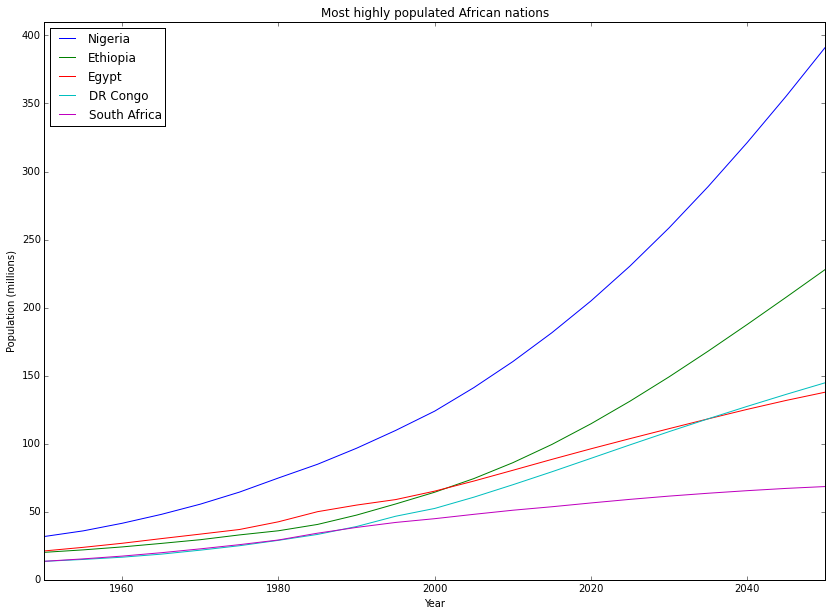

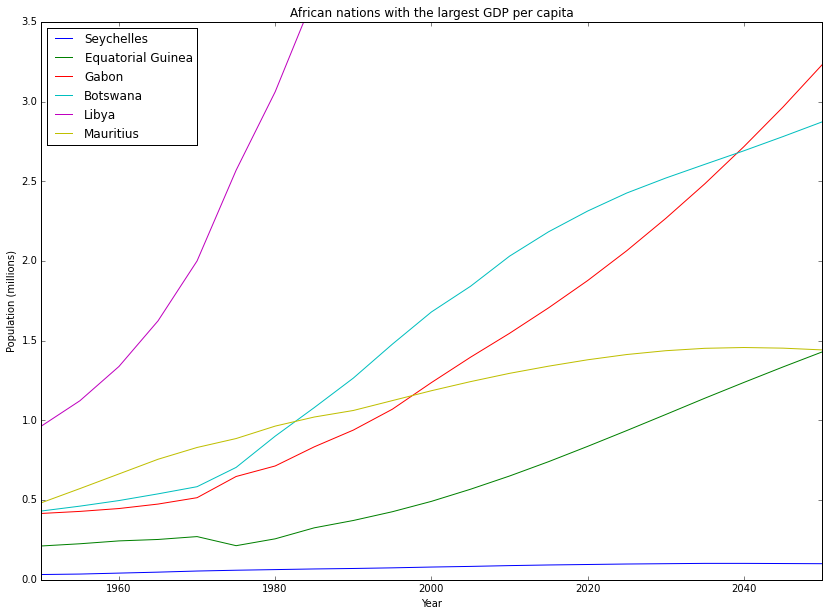

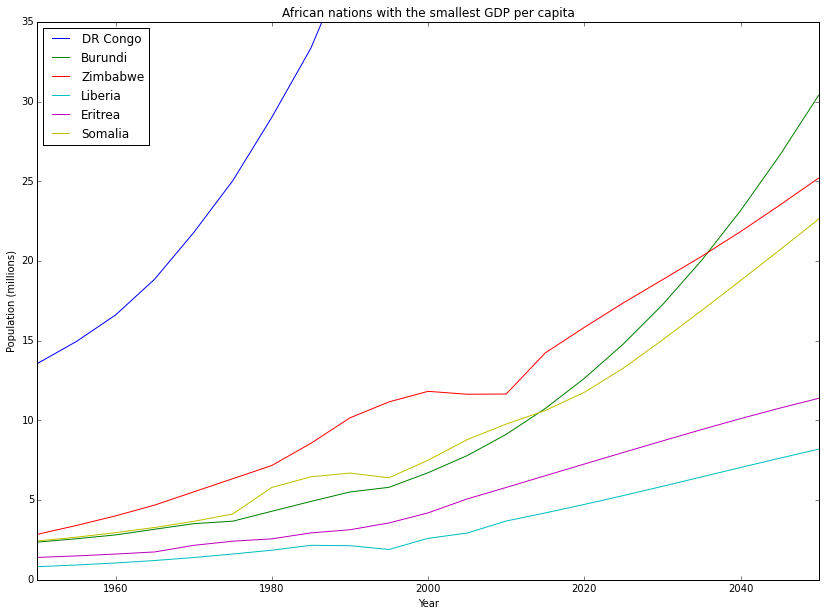

In [13]:
def plotpop(x1,x2,y1,y2,africas,title):
    """resize figure"""
    plt.figure(figsize=(14,10))

    for country in africas:
        row = dataframe.ix[country]
        plt.plot(row.index,row,label=row.name)

    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=y1,ymax=y2)

    plt.xticks(rotation=0)
    plt.legend(loc='best')
    plt.xlabel("Year")
    plt.ylabel("Population (millions)")
    plt.title(title)
    plt.show()
    
plotpop(1950,2050,0,410,highPOP,"Most highly populated African nations")
plotpop(1950,2050,0,3.5,highGDP,"African nations with the largest GDP per capita")
plotpop(1950,2050,0,35,lowGDP,"African nations with the smallest GDP per capita")

label overlap,
shifting
Botswana
down
Burundi


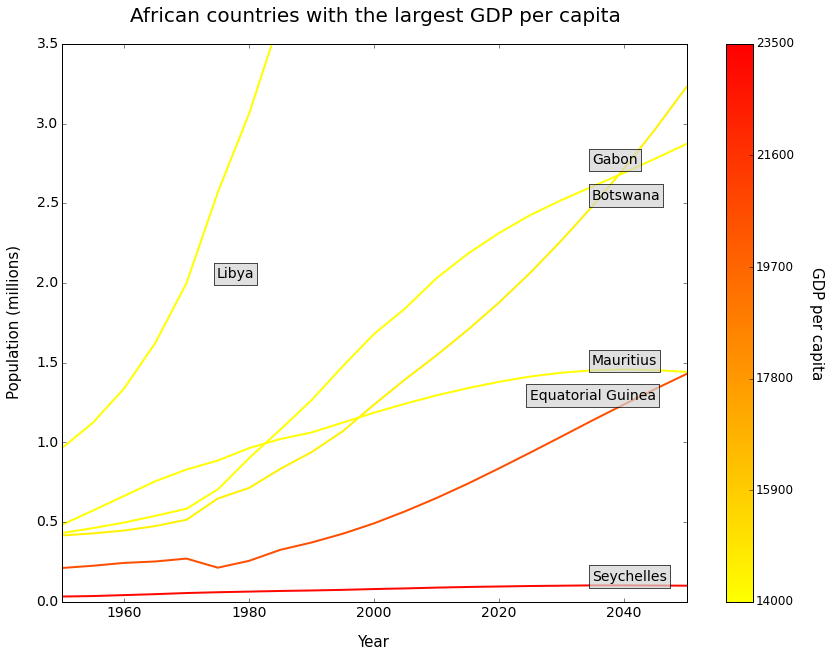

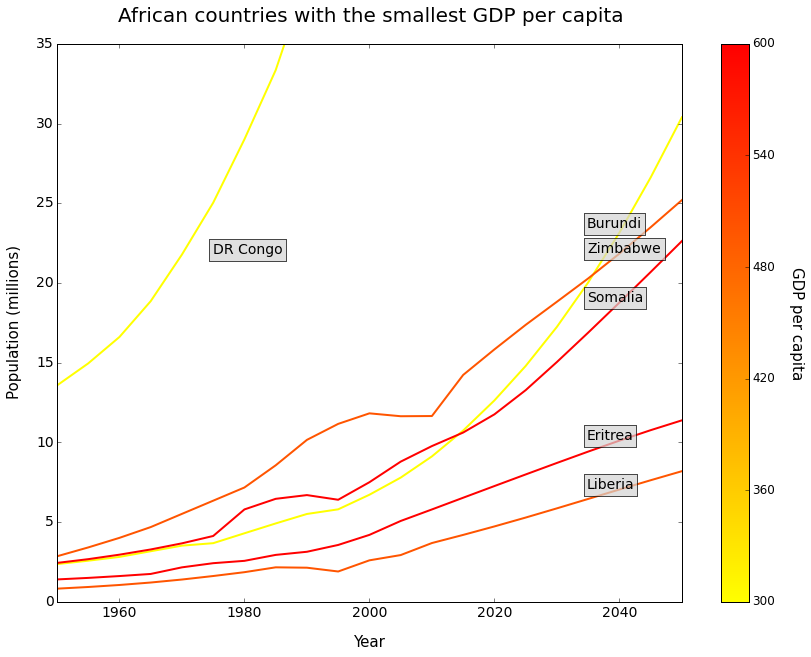

In [14]:
def plotpopcolor(x1,x2,y1,y2,africas,z,z1,z2,title,label):
    """plotting with a heat map for GDP"""
    plt.figure(figsize=(14,10))
    
    min,max = (z1,z2)
    # a colormap gradient
    my_cmap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['yellow','red'])
    CS3 = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=z1, vmax=z2))
    # set up an "array for the scalar mappable" (or else will get errors below) 
    CS3._A = []
    
    box = dict(boxstyle='square', facecolor='lightgrey', alpha=0.7)
    
    i = 0
    lastmark=10.0
    for country in africas:
        row = dataframe.ix[country]
        r = 1
        g = (max-float(z[i]))/(max-min)
        b = 0
        plt.plot(row.index, row, label=row.name, color=(r,g,b), linewidth=2)
        i += 1
    
    if label == True:
        # for labeling the plot
        yearmark = 2040
        min_space = 0.03
        extra_space = 0.03
        i = 0
        for country in africas:
            row = dataframe.ix[country]
            thismark = dataframe.ix[country,2040]
            thisfinal = dataframe.ix[country,2050]
            if dataframe.ix[country,2050] > y2: #if the final point is too high
                plt.text(row.index[5], row[1970]+extra_space, row.name, bbox=box, fontsize=14)
            elif abs(thismark-lastmark)/(y2-y1) > min_space:
                shift = 0
                if len(country) > 15:
                    shift = -2
                if row.name == 'Burundi':
                    print row.name
                    extra_space = 0.3
                plt.text(row.index[-4+shift], row[yearmark]+extra_space, row.name, bbox=box, fontsize=14)
                extra_space=0.03
            elif abs(thismark-lastmark)/(y2-y1) < min_space:
                print "label overlap,"
                print "shifting"
                print country
                """selecting which one should be on top"""
                if thisfinal >= lastfinal:
                    pm = 1.0
                    print "up"
                else:
                    pm = -1.0
                    print "down"
                plt.text(row.index[-4],row[yearmark]+pm*(y2-y1)*1.6*min_space,row.name,bbox=box,fontsize=14)
            lastmark = thismark
            lastfinal = thisfinal
            i += 1
    
    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=y1,ymax=y2)
    plt.tick_params(axis='both', labelsize=14)

    plt.xlabel("Year", fontsize=15, labelpad=15)
    plt.ylabel("Population (millions)", fontsize=15, labelpad=15)
    plt.title(title, fontsize=20, y=1.03)
    
    # plot the colorbar
    cbar_ticks = range(z1, z2+(z2-z1)/5, (z2-z1)/5)
    cbar = plt.colorbar(CS3)
    cbar.set_label("GDP per capita", rotation=270, fontsize=15, labelpad=30)
    cbar.set_ticks(cbar_ticks)
    cbar.ax.set_yticklabels([str(a) for a in cbar_ticks])
    cbar.ax.tick_params(labelsize=12)

plotpopcolor(1950,2050,0,3.5,highGDP,highGDPval,14000,23500,"African countries with the largest GDP per capita",True)
plt.savefig("largeGDPafricas.png", bbox_inches="tight", dpi=144)
plotpopcolor(1950,2050,0,35,lowGDP,lowGDPval,300,600,"African countries with the smallest GDP per capita",True)
plt.savefig("smallGDPafricas.png", bbox_inches="tight", dpi=144)

In [15]:
"""import the 2014 GDP per capita for all countries"""
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
website_html = requests.get(url).text
#print website_html

In [16]:
def get_html_tables(html):
    dom = web.Element(html)
#    tbls = dom('table') # all the tables
    tbls = dom.by_class('wikitable sortable')  # the tables we want
    return tbls

table = get_html_tables(website_html)
print "table length: %d" %len(table)
for t in table:
    print t.attributes
print ""

table = get_html_tables(website_html)[0] # [0] to reutrn the first one
print table.attributes

table length: 3
{u'style': u'margin-left:auto;margin-right:auto;text-align: right', u'class': u'wikitable sortable'}
{u'style': u'margin-left:auto;margin-right:auto;text-align: right', u'class': u'wikitable sortable'}
{u'style': u'margin-left:auto;margin-right:auto;text-align: right', u'class': u'wikitable sortable'}

{u'style': u'margin-left:auto;margin-right:auto;text-align: right', u'class': u'wikitable sortable'}


In [17]:
def get_countries_GDP(table):
#    result = defaultdict(dict)
    result = {}
    rows = table('tr') # rows are identified by 'tr' tag
    rows = rows[1:] # ignore headers 
    for row in rows:
        # get the content from each row
        country_name = row('td')[1]('a')[0].content
        GDP = row('td')[2].content.replace(',','')
        result[country_name] = int(GDP) # add to dictionary 
    return result

GDP_dict = get_countries_GDP(table)
print GDP_dict


{u'Canada': 44967, u'Turkmenistan': 14217, u'Lithuania': 27259, u'Cambodia': 3276, u'Ethiopia': 1642, u'Swaziland': 9553, u'Belize': 8333, u'Argentina': 22302, u'Bolivia': 6224, u'Bahamas, The': 25075, u'Burkina Faso': 1688, u'Bahrain': 49020, u'Saudi Arabia': 52311, u'Jordan': 11971, u'Cape Verde': 6424, u'Slovenia': 29867, u'Guatemala': 7550, u'Bosnia and Herzegovina': 9892, u'Guinea': 1257, u'World': 14982, u'Congo, Rep.': 6635, u'Spain': 33835, u'Liberia': 886, u'Netherlands': 47960, u'Paraguay': 8476, u'Pakistan': 4749, u'Oman': 43847, u'Tanzania': 2742, u"People's Republic of China": 13224, u'Gabon': 20757, u'New Zealand': 35305, u'Yemen': 3788, u'Jamaica': 8610, u'Albania': 11391, u'Samoa': 5199, u'United Arab Emirates': 66347, u'Kosovo': 9281, u'India': 5808, u'Azerbaijan': 17761, u'Madagascar': 1445, u'Lesotho': 2918, u'Saint Vincent and the Grenadines': 10684, u'Kenya': 3099, u'Tajikistan': 2698, u'Turkey': 19698, u'Afghanistan': 1944, u'Czech Republic': 30047, u'Eritrea': 12

In [18]:
"""convert GDP dictionary to dataframe"""
dataframe2 = pd.DataFrame.from_dict(GDP_dict,orient='index')
# replace dataframe with a version sorted by country name
dataframe2.sort_index(axis=0, inplace=True)
# rename an country
dataframe2.rename(index={"Democratic Republic of the Congo": "DR Congo"}) 
dataframe2.columns = ['GDP per capita']
dataframe2

,GDP per capita
Afghanistan,1944
Albania,11391
Algeria,13888
Angola,7270
Antigua and Barbuda,22998
Argentina,22302
Armenia,8164
Australia,46550
Austria,46640
Azerbaijan,17761


In [19]:
print "dataframe point:"
print dataframe2.ix[7]
print ""
print "integer data point:"
print dataframe2.ix[7][0]

dataframe point:
GDP per capita    46550
Name: Australia, dtype: int64

integer data point:
46550


In [20]:
def compare(list1,list2):
    for value in list1:
        if value not in list2:
             print value
print "These countries from the population dataframe have no GDP match:"
compare(dataframe.index,dataframe2.index)
print ""
print "These countries from the GDP dataframe have no population match:"
compare(dataframe2.index,dataframe.index)

These countries from the population dataframe have no GDP match:
American Samoa
Andorra
Anguilla
Aruba
Bahamas
Bermuda
British Virgin Islands
Cayman Islands
China
Cook Islands
Cuba
Curaçao
DR Congo
Faroe Islands
Federated States of Micronesia
French Polynesia
Gambia
Gibraltar
Greenland
Guam
Guernsey
Isle of Man
Ivory Coast
Jersey
Liechtenstein
Macau
Monaco
Montserrat
Nauru
New Caledonia
North Korea
Northern Mariana Islands
Palestine
Puerto Rico
Republic of the Congo
Saint Barthélemy
Saint Helena, Ascension and Tristan da Cunha
Saint Martin
Saint Pierre and Miquelon
Sint Maarten
Somalia
South Korea
Syria
Taiwan
Turks and Caicos Islands
United States Virgin Islands
Wallis and Futuna
Western Sahara

These countries from the GDP dataframe have no population match:
Bahamas, The
Congo, Dem. Rep.
Congo, Rep.
Côte d'Ivoire
Gambia, The
Micronesia
People's Republic of China
Republic of China
Republic of Korea


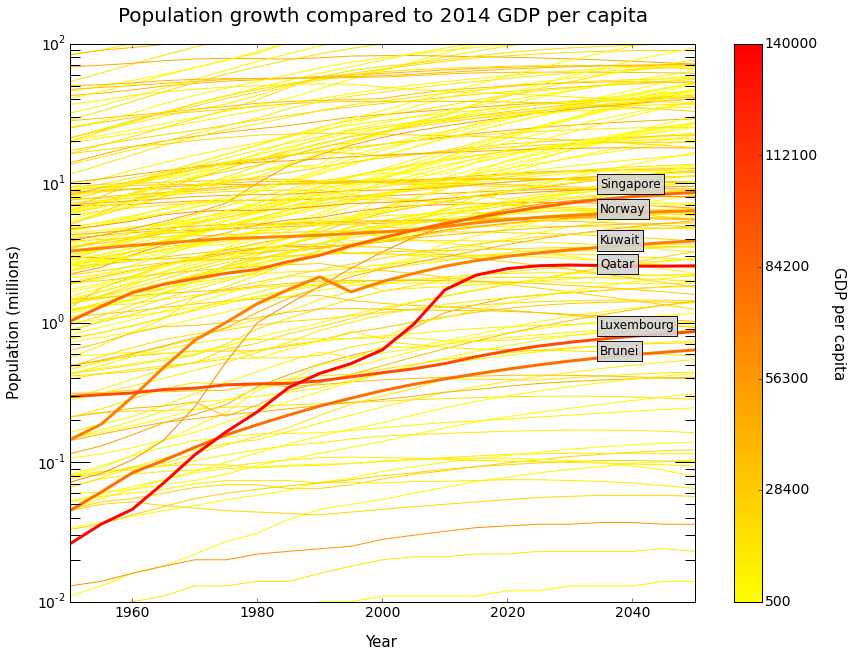

In [21]:
# lists of all coutries that are in both databases and their GDP per capita
all_countries = [country for country in dataframe.index if country in dataframe2.index]
all_GDP = [dataframe2.ix[country][0] for country in all_countries]

def plotpop_all_log(x1,x2,y1,y2,country_list,z,z1,z2,title,label):
    
    plt.figure(figsize=(14,10))

    # a colormap gradient
    my_cmap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['yellow','red'])
    CS3 = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=z1, vmax=z2))
    # set up an "array for the scalar mappable" (or else will get errors below) 
    CS3._A = []
    
    box = dict(boxstyle='square', facecolor='lightgrey', alpha=0.9)
    
    i = 0
    lastmark = 10.0
    lastfinal = 10.0
    labeled_countries = []
    labeled_colors = []
    for country in country_list:
        
        row = dataframe.ix[country]
        r = 1
        g = (z2-float(z[i]))/(z2-z1)
        b = 0
        plt.semilogy(row.index, row, label=row.name, color=(r,g,b))
        
        if label == True:
            # mark some countries to be labeled
            if all_GDP[i] > 67000:
                labeled_countries.append(country)
                labeled_colors.append([r,g,b])
        i += 1

    if label == True:
        label_pads = [0, 0.05, 0.1, 0, -0.05, 1.3] # manual shifts for the labels
        yearmark = 2040
        for i, country in enumerate(labeled_countries):
            row = dataframe.ix[country]
            r,g,b = labeled_colors[i]
            plt.semilogy(row.index, row, label=row.name, color=(r,g,b),
                             linewidth=3) # re-plot thicker lines for these
            plt.text(row.index[-4], row[yearmark]+label_pads[i] , row.name,
                         bbox=box, fontsize=12) # (x-position, y-position, label, ...)

    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=y1,ymax=y2)
    plt.tick_params(axis='both', labelsize=14)
    # enlarge the y-axis ticks
    plt.tick_params(axis='y', length=20, width=1, which='major')
    plt.tick_params(axis='y', length=10, width=1, which='minor')
    
    plt.xlabel("Year", fontsize=15, labelpad=15)
    plt.ylabel("Population (millions)", fontsize=15, labelpad=15)
    plt.title(title, fontsize=20, y=1.03)

    cbar_ticks = range(z1, z2+(z2-z1)/5, (z2-z1)/5)
    cbar = plt.colorbar(CS3)
    cbar.set_label("GDP per capita", rotation=270, fontsize=15, labelpad=30)
    cbar.set_ticks(cbar_ticks)
    cbar.ax.set_yticklabels([str(a) for a in cbar_ticks])
    cbar.ax.tick_params(labelsize=14)
    
plotpop_all_log(1950, 2050, 0.01, 100, all_countries, all_GDP,
                    int(min(all_GDP)/100)*100-100,
                    int(m.ceil(max(all_GDP)/10000)*10000)+10000,
                    "Population growth compared to 2014 GDP per capita",True)

plt.savefig("popgrowthGDPall.png", bbox_inches="tight", dpi=144)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


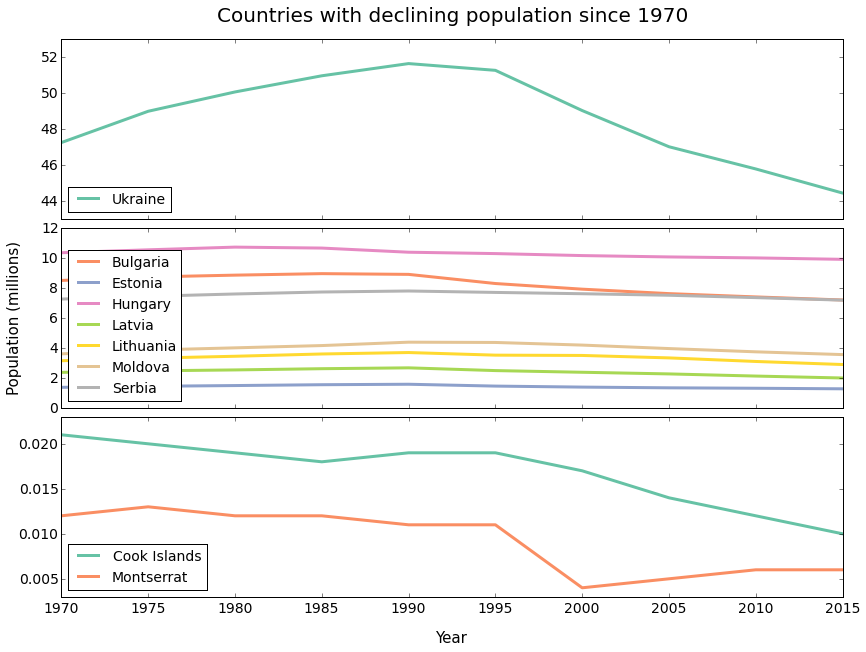

In [22]:
import seaborn.apionly as sns
%matplotlib inline

cp10 = sns.color_palette("Set2", 10)

d_countries = [country for country in dataframe.index if dataframe.ix[country][1970] > dataframe.ix[country][2015]]
d_countries_1 = [country for country in d_countries if dataframe.ix[country][2015] < 1]
d_countries_2 = [country for country in d_countries if 1 < dataframe.ix[country][2015] < 20]
d_countries_3 = [country for country in d_countries if dataframe.ix[country][2015] > 20]

plt.figure(figsize=(14,10))

x1, x2 = 1970, 2015

i = 0
plot1 = plt.subplot(311)
for country in d_countries_3:
    row = dataframe.ix[country]
    plt.plot(row.index,row,label=row.name, linewidth=3, color=cp10[i])
    i += 1
plt.xlim(xmin=x1,xmax=x2)
plt.ylim(ymin=43,ymax=53)
plt.legend(loc='lower left', fontsize=14)
plt.title("Countries with declining population since 1970",fontsize=20,y=1.07)
plt.tick_params(axis='both', labelsize=14)
plot1.set_xticklabels([])

plot2 = plt.subplot(312)
for country in d_countries_2:
    row = dataframe.ix[country]
    plt.plot(row.index,row,label=row.name, linewidth=3, color=cp10[i])
    i += 1
plt.xlim(xmin=x1,xmax=x2)
plt.ylim(ymin=0,ymax=12)
plt.legend(loc='lower left', fontsize=14)
plt.ylabel("Population (millions)",fontsize=15,labelpad=20)
plt.tick_params(axis='both', labelsize=14)
plot2.set_xticklabels([])

plt.subplot(313)
for country in d_countries_1:
    row = dataframe.ix[country]
    plt.plot(row.index,row,label=row.name, linewidth=3, color=cp10[i])
    i += 1
plt.xlim(xmin=x1,xmax=x2)
plt.ylim(ymin=0.003,ymax=0.023)
plt.legend(loc='lower left', fontsize=14)
plt.xlabel("Year",fontsize=15,labelpad=15)
plt.tick_params(axis='both', labelsize=14)

plt.subplots_adjust(hspace=0.05)
plt.savefig("declining_pop_since_1970.png", bbox_inches='tight', dpi=144)
plt.show()

In [28]:
dif_2015_2050 = [dataframe.loc[country, 2050] - dataframe.loc[country, 2015] for country in dataframe.index]
dataframe["Growth amount"] = dif_2015_2050
countries = dataframe.sort("Growth amount")[::-1]["Growth amount"]

bottom_countries_info = countries[-9:][::-1]
bottom_countries = [dataframe.sort("Growth amount").index[i] for i in range(9)]

top_countries_info = countries[1:11]
top_countries = [dataframe.sort("Growth amount")[::-1].index[i] for i in range(1,9)]
top_countries # countries with projected growth of over 50 million

j=0
i=0
for country in countries.index:
    if countries[i] < 0:
        j += 1
    print country, countries[i]
    i += 1
print "total =", i, "decrease =", j

print len(dataframe.index)


del dataframe["Growth amount"]

World 2151.651
India 404.858
Nigeria 209.734
Ethiopia 128.601
Pakistan 91.762
Bangladesh 81.198
United States 76.96
Tanzania 67.541
DR Congo 65.43
Uganda 56.375
Philippines 54.382
Egypt 49.385
Indonesia 44.19
Iraq 39.463
Malawi 33.816
Mozambique 33.695
Afghanistan 31.231
Mexico 28.831
Burkina Faso 28.498
Cameroon 28.173
Brazil 28.045
Angola 26.263
Niger 26.176
Ghana 26.088
Kenya 24.83
Zambia 23.926
Sudan 23.021
Madagascar 21.995
Mali 21.44
Burundi 19.649
Yemen 19.343
Iran 18.22
Vietnam 16.825
Algeria 15.902
South Africa 14.853
Rwanda 14.845
South Sudan 14.801
Guinea 14.627
Nepal 14.433
Myanmar 14.353
Syria 14.161
Ivory Coast 13.816
Senegal 13.269
Saudi Arabia 12.498
Malaysia 12.415
Somalia 12.01
Benin 11.67
Venezuela 10.98
Zimbabwe 10.969
Argentina 10.08
Turkey 9.876
Colombia 9.491
Togo 9.031
Chad 8.842
Morocco 8.704
Guatemala 8.077
Sierra Leone 7.714
United Kingdom 7.065
Cambodia 6.63
Peru 6.499
Australia 6.261
Canada 6.036
Uzbekistan 5.917
Republic of the Congo 5.446
Ecuador 5.234
Bo

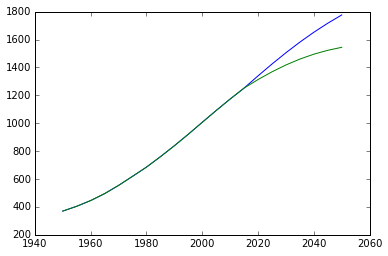

In [53]:
row = dataframe.ix["India"]
upper_bound, lower_bound = [], []
for i in range(0, len(row)):
    ii = (i-13)*(i >= 13)
    upper_bound.append(dataframe.ix["India",list(dataframe.columns)[i]]*1.01**ii)
    lower_bound.append(dataframe.ix["India",list(dataframe.columns)[i]]*0.99**ii)
plt.plot(row.index, upper_bound, label=row.name)
plt.plot(row.index, lower_bound, label=row.name)

    
#for i in range(0, len(row)):
    
#for i in range(13, len(row))
#    i_fac = i-13
#    plt.plot(row.index[i])

Index([1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050],
      dtype='object')
[1950L, 1955L, 1960L, 1965L, 1970L, 1975L, 1980L, 1985L, 1990L, 1995L, 2000L, 2005L, 2010L, 2015L, 2020L, 2025L, 2030L, 2035L, 2040L, 2045L, 2050L]


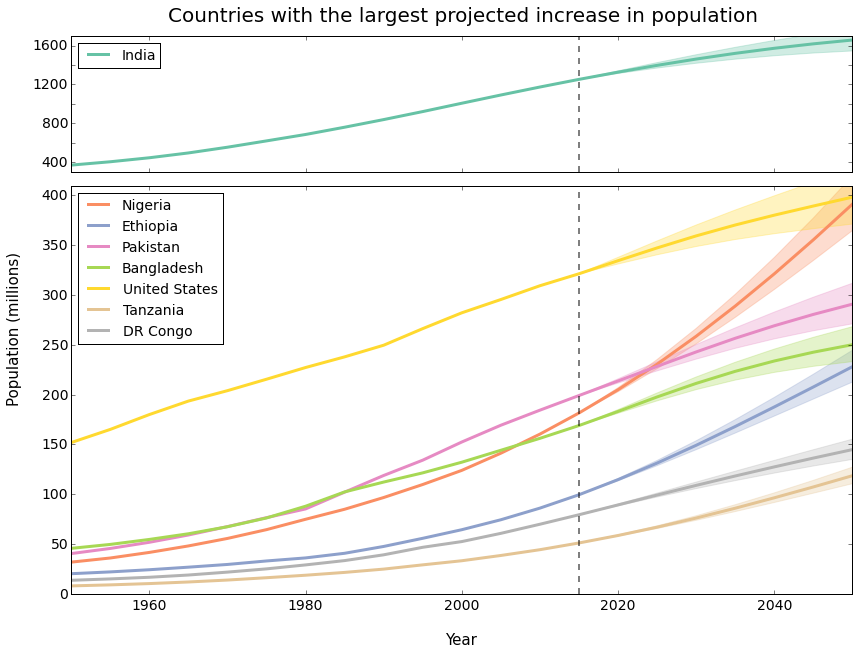

In [63]:
def plotpop(x1,x2,y1,y2,countries,title):
    
    plt.figure(figsize=(14,10))
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])
    
    i = 0
    
    ax_upper = plt.subplot(gs[0])
    row = dataframe.ix[countries[0]]
    ax_upper.plot(row.index,row,label=row.name, linewidth=3, color=cp10[i])
    
    upper_bound, lower_bound = [], []
    for j in range(0, len(row)):
        ii = (j-13)*(j >= 13)
        upper_bound.append(dataframe.ix[countries[0], list(dataframe.columns)[j]]*1.01**ii)
        lower_bound.append(dataframe.ix[countries[0], list(dataframe.columns)[j]]*0.99**ii)
#    plt.plot(row.index, upper_bound, linewidth=1, color=cp10[i], ls='dashed')
#    plt.plot(row.index, lower_bound, linewidth=1, color=cp10[i], ls='dashed')
    plt.fill_between(list(dataframe.columns), upper_bound, lower_bound, color=cp10[i], alpha=0.3)

    i += 1
    
    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=300,ymax=1700)
    plt.tick_params(axis='both', labelsize=14)
    ax_upper.set_xticklabels([])
    ax_upper.set_yticklabels(['',400,'',800,'',1200,'',1600])
    plt.axvline(2015, 0, 2000, color='black', alpha=0.5, linewidth=2, ls='dashed')
    plt.title(title, fontsize=20, y=1.07)
    
    ax_lower = plt.subplot(gs[1])
    for country in countries[1:]:
        row = dataframe.ix[country]
        ax_lower.plot(row.index,row,label=row.name, linewidth=3, color=cp10[i])
        
        upper_bound, lower_bound = [], []
        for j in range(0, len(row)):
            ii = (j-13)*(j >= 13)
            upper_bound.append(dataframe.ix[country, list(dataframe.columns)[j]]*1.01**ii)
            lower_bound.append(dataframe.ix[country, list(dataframe.columns)[j]]*0.99**ii)
#            plt.plot(row.index, upper_bound, linewidth=1, color=cp10[i], ls='dashed')
#            plt.plot(row.index, lower_bound, linewidth=1, color=cp10[i], ls='dashed')
        plt.fill_between(list(dataframe.columns), upper_bound, lower_bound, color=cp10[i], alpha=0.3)
        
        i += 1
                
    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=y1,ymax=y2)
    plt.tick_params(axis='both', labelsize=14)
    plt.xlabel("Year", fontsize=15, labelpad=20)
    plt.ylabel("Population (millions)", fontsize=15, labelpad=20, y=0.65)
    plt.axvline(2015, 0, 2000, color='black', alpha=0.5, linewidth=2, ls='dashed')
    
    plt.subplots_adjust(hspace=0.05)

    ax_upper.legend(loc='best', fontsize=14)
    ax_lower.legend(loc='best', fontsize=14)
    
plotpop(1950,2050,0,410,top_countries,"Countries with the largest projected increase in population")
plt.savefig("large_projected_growth.png", bbox_inches="tight", dpi=144)

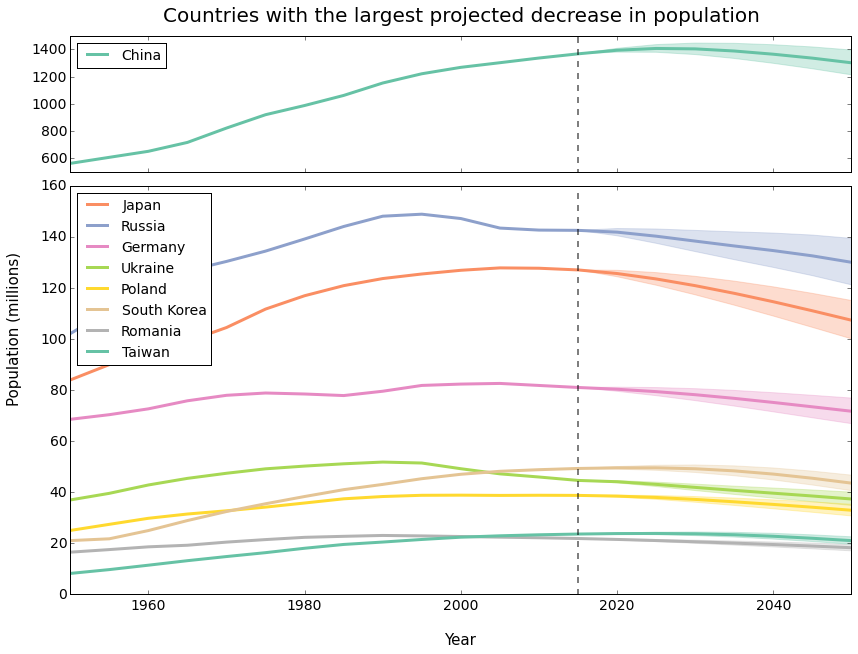

In [64]:
def plotpop(x1,x2,y1,y2,countries,title):
    
    plt.figure(figsize=(14,10))
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])
    
    i = 0
    
    ax_upper = plt.subplot(gs[0])
    row = dataframe.ix[countries[0]]
    ax_upper.plot(row.index,row,label=row.name, linewidth=3, color=cp10[i])
    
    upper_bound, lower_bound = [], []
    for j in range(0, len(row)):
        ii = (j-13)*(j >= 13)
        upper_bound.append(dataframe.ix[countries[0], list(dataframe.columns)[j]]*1.01**ii)
        lower_bound.append(dataframe.ix[countries[0], list(dataframe.columns)[j]]*0.99**ii)
#    plt.plot(row.index, upper_bound, linewidth=1, color=cp10[i], ls='dashed')
#    plt.plot(row.index, lower_bound, linewidth=1, color=cp10[i], ls='dashed')
    plt.fill_between(list(dataframe.columns), upper_bound, lower_bound, color=cp10[i], alpha=0.3)
    
    i += 1
    
    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=500,ymax=1500)
    plt.tick_params(axis='both', labelsize=14)
    ax_upper.set_xticklabels([])
#    ax_upper.set_yticklabels(['',600,'',1000,'',1400])
    plt.axvline(2015, -100, 2000, color='black', alpha=0.5, linewidth=2, ls='dashed')
    plt.title(title, fontsize=20, y=1.07)
    
    ax_lower = plt.subplot(gs[1])
    for country in countries[1:]:
        row = dataframe.ix[country]
        ax_lower.plot(row.index,row,label=row.name, linewidth=3, color=cp10[i])
        
        upper_bound, lower_bound = [], []
        for j in range(0, len(row)):
            ii = (j-13)*(j >= 13)
            upper_bound.append(dataframe.ix[country, list(dataframe.columns)[j]]*1.01**ii)
            lower_bound.append(dataframe.ix[country, list(dataframe.columns)[j]]*0.99**ii)
#            plt.plot(row.index, upper_bound, linewidth=1, color=cp10[i], ls='dashed')
#            plt.plot(row.index, lower_bound, linewidth=1, color=cp10[i], ls='dashed')
        plt.fill_between(list(dataframe.columns), upper_bound, lower_bound, color=cp10[i], alpha=0.3)
        
        i += 1
        
    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=y1,ymax=y2)
    plt.tick_params(axis='both', labelsize=14)
    plt.xlabel("Year", fontsize=15, labelpad=20)
    plt.ylabel("Population (millions)", fontsize=15, labelpad=20, y=0.65)
    plt.axvline(2015, -100, 2000, color='black', alpha=0.5, linewidth=2, ls='dashed')
    
    plt.subplots_adjust(hspace=0.05)

    ax_upper.legend(loc='best', fontsize=14)
    ax_lower.legend(loc='upper left', fontsize=14)
    
plotpop(1950,2050, 0, 160, bottom_countries,"Countries with the largest projected decrease in population")
plt.savefig("large_projected_decline.png", bbox_inches="tight", dpi=144)